In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)
iris_std[:3, :]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [5]:
iris_std.shape

(150, 4)

In [6]:
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [7]:
iris_cov1 = np.dot(iris_std.T, iris_std) / len(iris_std-1)
iris_cov1

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [8]:
# 넘파이 공분단 행렬
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [9]:
eig_val, eig_vecs = np.linalg.eig(iris_cov)

In [10]:
eig_val

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [11]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [12]:
eig_val1, eig_vecs1 = np.linalg.eig(iris_cov1)

In [13]:
eig_val1

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [14]:
eig_vecs1

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [15]:
pc1 = iris_std.dot(np.reshape(eig_vecs.T[0], (4, 1)))
pc2 = iris_std.dot(np.reshape(eig_vecs.T[1], (4, 1)))

In [16]:
pc1[:3]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905]])

In [17]:
pc2[:3]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802]])

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

iris_pca = pca.fit_transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [19]:
iris_pca[:3, :]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

## 6.2 PCA(Principal component Analysis)

In [20]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


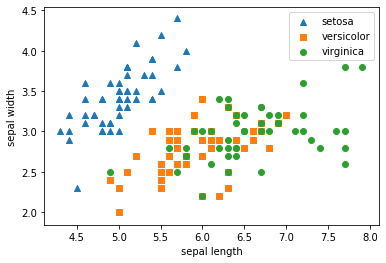

In [21]:
markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']    
    plt.scatter(x_axis_data, y_axis_data, marker=markers, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

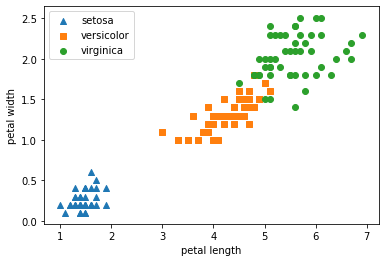

In [22]:
markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['petal_length']
    y_axis_data = irisDF[irisDF['target']==i]['petal_width']    
    plt.scatter(x_axis_data, y_axis_data, marker=markers, label=iris.target_names[i])
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

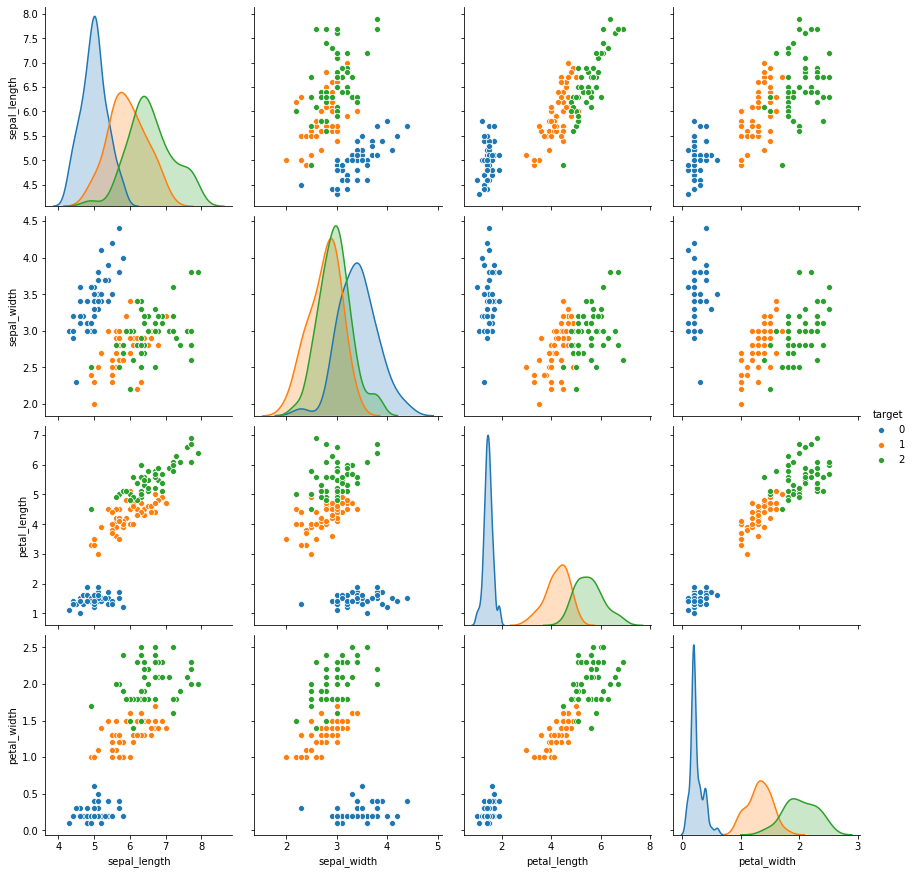

In [23]:
sns.pairplot(irisDF, hue='target', size=3)

In [24]:
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])
irist_pca = pca.fit_transform(iris_scaled)
irist_pca.shape

(150, 2)

In [25]:
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


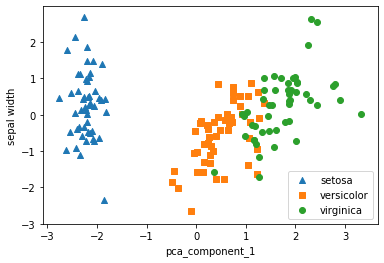

In [26]:
markers = ['^', 's', 'o']

for i, markers in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF['target']==i]['pca_component_2']    
    plt.scatter(x_axis_data, y_axis_data, marker=markers, label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('sepal width')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(random_state=156)
scores = cross_val_score(rfc, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [28]:
pca_x = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rfc, pca_x, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88
